In [1]:
import numpy as np        
import pandas as pd     
import seaborn as sns
import matplotlib.pyplot as plt
# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Loading Dataset

In [2]:
train_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/crop_recommendation/train_set_label.csv")

## Basic EDA

In [3]:
train_data.head()

,N,P,K,temperature,humidity,ph,rainfall,crop
0,17.0,136.0,196.0,23.871923,90.499390,5.882156,103.054809,apple
1,49.0,69.0,82.0,18.315615,15.361435,7.263119,81.787105,chickpea
2,74.0,49.0,38.0,23.314104,71.450905,7.488014,164.497037,jute
3,104.0,35.0,28.0,27.510061,50.666872,6.983732,143.995555,coffee
4,23.0,72.0,84.0,19.020613,17.131591,6.920251,79.926981,chickpea


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            1650 non-null   float64
 1   P            1650 non-null   float64
 2   K            1650 non-null   float64
 3   temperature  1650 non-null   float64
 4   humidity     1650 non-null   float64
 5   ph           1650 non-null   float64
 6   rainfall     1650 non-null   float64
 7   crop         1650 non-null   object 
dtypes: float64(7), object(1)
memory usage: 103.2+ KB


In [5]:
train_data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
crop           0
dtype: int64

In [6]:
train_data.describe(include='all')

,N,P,K,temperature,humidity,ph,rainfall,crop
count,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pomegranate
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75
mean,50.370308,53.419241,48.111081,25.647214,71.563115,6.485583,103.965778,NaN
std,36.743966,33.320501,50.537044,5.005005,22.198130,0.765865,55.510324,NaN
min,0.000000,5.000000,5.000000,9.467960,14.273280,3.525366,20.360011,NaN
25%,21.000000,27.000000,20.552276,22.807269,60.120113,5.986160,65.025621,NaN
50%,37.000000,52.000000,31.575398,25.656980,80.547206,6.426118,95.246217,NaN
75%,84.738202,68.000000,49.000000,28.529953,90.003702,6.924943,127.887636,NaN


<AxesSubplot:>

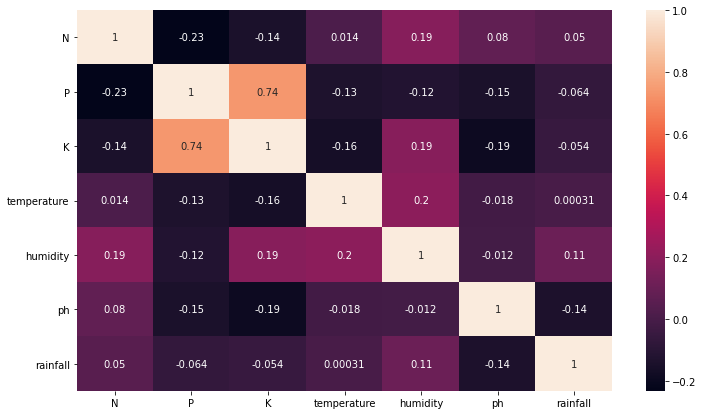

In [7]:
plt.figure(figsize=(12,7))
sns.heatmap(train_data.corr(), annot=True)

In [8]:
train_data.crop.value_counts(normalize=True)

pomegranate    0.045455
mango          0.045455
grapes         0.045455
pigeonpeas     0.045455
rice           0.045455
papaya         0.045455
coffee         0.045455
mothbeans      0.045455
kidneybeans    0.045455
lentil         0.045455
jute           0.045455
blackgram      0.045455
apple          0.045455
maize          0.045455
coconut        0.045455
chickpea       0.045455
mungbean       0.045455
muskmelon      0.045455
orange         0.045455
cotton         0.045455
watermelon     0.045455
banana         0.045455
Name: crop, dtype: float64

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data.crop = le.fit_transform(train_data.crop)

# Separating Input Features and Output Features

In [10]:
X = train_data.drop('crop', axis = 1)                                           
y = train_data['crop']             

# Splitting the data into Train and Validation Set


In [11]:
# import train_test_split
from sklearn.model_selection import train_test_split

In [12]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)

# Building Model

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [14]:
def GetBasedModel():
    basedModels = []
    basedModels.append(('LR'   , LogisticRegression()))
    basedModels.append(('LDA'  , LinearDiscriminantAnalysis()))
    basedModels.append(('KNN'  , KNeighborsClassifier()))
    basedModels.append(('CART' , DecisionTreeClassifier()))
    basedModels.append(('NB'   , GaussianNB()))
    basedModels.append(('SVM'  , SVC(probability=True)))
    basedModels.append(('AB'   , AdaBoostClassifier()))
    basedModels.append(('GBM'  , GradientBoostingClassifier()))
    basedModels.append(('RF'   , RandomForestClassifier()))
    basedModels.append(('ET'   , ExtraTreesClassifier()))
    
    return basedModels

In [15]:
def BasedLine2(X_train, y_train,models):
    num_folds = 10
    scoring = 'accuracy'
    results = []
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    return names, results

In [16]:
models = GetBasedModel()
names,results = BasedLine2(X_train, y_train,models)

LR: 0.968182 (0.018495)
LDA: 0.967424 (0.015909)
KNN: 0.981818 (0.009091)
CART: 0.978030 (0.015691)
NB: 0.993939 (0.008835)
SVM: 0.975000 (0.019770)
AB: 0.166667 (0.028548)
GBM: 0.983333 (0.008835)
RF: 0.995455 (0.009091)
ET: 0.994697 (0.009613)


**It looks like RandomForestClassifier is the best model**

### Scaling the data

In [17]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

### Building a RF model

In [18]:
rf=RandomForestClassifier().fit(X_train, y_train)
y_pred=rf.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.996969696969697

# Predict The Output For Testing Dataset



## Load Test Set

In [20]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/crop_recommendation/test_set_label.csv')

In [21]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            550 non-null    float64
 1   P            550 non-null    float64
 2   K            550 non-null    float64
 3   temperature  550 non-null    float64
 4   humidity     550 non-null    float64
 5   ph           550 non-null    float64
 6   rainfall     550 non-null    float64
dtypes: float64(7)
memory usage: 30.2 KB


In [22]:
test_data=scaler.transform(test_data)

## Make Prediction on Test Dataset

In [23]:
target = rf.predict(test_data)

In [24]:
target

array([13,  6, 12, 10, 14,  5, 10,  6, 10, 10,  8, 13, 16,  1,  4, 15,  7,
        5, 21, 14,  4, 20, 13, 11,  0, 16, 20, 21, 19, 13,  9, 14,  1, 17,
        2,  3,  9,  4, 10, 17,  7,  7, 20,  3,  7, 18, 21, 18, 21, 12, 11,
       12,  7, 18, 20,  9,  0,  4, 21,  0, 14,  5, 21, 14,  0,  9, 16,  7,
       21,  4, 11, 19,  6,  0, 11,  8, 13,  6,  6, 18, 18, 13,  1,  0,  9,
        6,  1,  3,  0, 11,  7, 16, 19,  2, 21, 13,  7,  0,  3, 16, 16, 15,
        4,  8, 16,  6, 18,  6,  6, 12, 19,  3, 11, 13,  5,  9,  1,  4, 10,
        8,  2,  5,  9, 14,  6, 17, 21,  4, 17,  2, 20, 13, 15, 13,  8, 14,
       19, 18,  5,  5, 12,  8,  8,  6,  3,  3, 17, 13, 16,  0,  5, 14, 11,
        3,  2, 10, 16,  9, 19, 17,  2, 12, 19,  8, 18, 13,  3, 15,  3, 10,
       12,  4,  1,  5, 20, 12, 21, 21,  8,  4, 18, 17, 20, 16,  6,  2, 18,
       12, 12,  2,  8, 16, 17, 11, 11,  6, 17, 15,  0,  5,  4, 21, 15, 15,
        4,  3, 11, 14,  6, 15, 13, 20, 10, 20,  9,  7, 18, 10,  8,  7, 11,
       11, 15, 12, 14,  1

In [25]:
target = le.inverse_transform(target)

In [26]:
target

array(['mothbeans', 'cotton', 'mango', 'lentil', 'mungbean', 'coffee',
       'lentil', 'cotton', 'lentil', 'lentil', 'jute', 'mothbeans',
       'orange', 'banana', 'coconut', 'muskmelon', 'grapes', 'coffee',
       'watermelon', 'mungbean', 'coconut', 'rice', 'mothbeans', 'maize',
       'apple', 'orange', 'rice', 'watermelon', 'pomegranate',
       'mothbeans', 'kidneybeans', 'mungbean', 'banana', 'papaya',
       'blackgram', 'chickpea', 'kidneybeans', 'coconut', 'lentil',
       'papaya', 'grapes', 'grapes', 'rice', 'chickpea', 'grapes',
       'pigeonpeas', 'watermelon', 'pigeonpeas', 'watermelon', 'mango',
       'maize', 'mango', 'grapes', 'pigeonpeas', 'rice', 'kidneybeans',
       'apple', 'coconut', 'watermelon', 'apple', 'mungbean', 'coffee',
       'watermelon', 'mungbean', 'apple', 'kidneybeans', 'orange',
       'grapes', 'watermelon', 'coconut', 'maize', 'pomegranate',
       'cotton', 'apple', 'maize', 'jute', 'mothbeans', 'cotton',
       'cotton', 'pigeonpeas', 'pige

## Saving prediciton results 


In [27]:
res = pd.DataFrame(target) 
res.columns = ["prediction"]
res.to_csv("submission.csv", index = False)